In [2]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Unlabeled data')

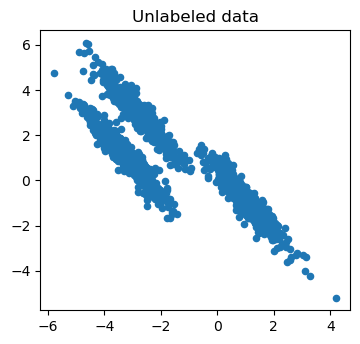

In [8]:
n=1500
random_state=170
x, y = make_blobs(n_samples=n, random_state=random_state)
transformation=[[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
x_aniso = np.dot(x, transformation)

plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(x_aniso[:, 0], x_aniso[:, 1], s=20)
plt.title("Unlabeled data")

/Users/loicvandenbroeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Labeled data with Kmeans')

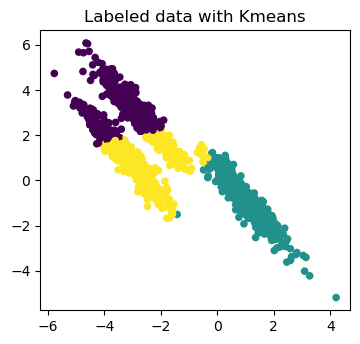

In [3]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x_aniso)
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(x_aniso[:, 0], x_aniso[:, 1], c=y_pred, s=20)
plt.title("Labeled data with Kmeans clustering")

# Spectral clustering in 3 steps

Step 1 - Similarity graph

In [4]:
from scipy.spatial import distance

In [5]:
rbf_param = 7.6 #hyperparameter spectral clustering

#construct similarity graph

K = np.exp(-rbf_param * distance.cdist(x_aniso, x_aniso, metric='sqeuclidean'))
D = K.sum(axis=1)
D = np.sqrt(1/D)
M = np.multiply(D[np.newaxis, :], np.multiply(K, D[:, np.newaxis]))

Step 2 - Eigenvalue decomposition

In [6]:
from scipy import linalg
from sklearn.preprocessing import normalize

In [7]:
U, Sigma, _ = linalg.svd(M, full_matrices=False, lapack_driver='gesvd')
Usubset = U[:,0:3]

Step 3 - Perform KMeans clustering

/Users/loicvandenbroeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Labeled data with Spectral Clustering')

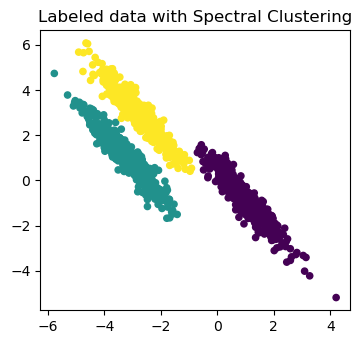

In [8]:
y_pred_sc = KMeans(n_clusters=3).fit_predict(normalize(Usubset))

plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(x_aniso[:, 0], x_aniso[:, 1], c=y_pred_sc, s=20)
plt.title("Labeled data with Spectral Clustering")